# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("airbnb_hw.csv")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
print("Dimensions: ",df.shape,"\n")
print("Observations: ",len(df),"\n")
vars = np.asarray(df.columns)
print("Variables :",vars)


Dimensions:  (30478, 13) 

Observations:  30478 

Variables : ['Host Id' 'Host Since' 'Name' 'Neighbourhood ' 'Property Type'
 'Review Scores Rating (bin)' 'Room Type' 'Zipcode' 'Beds'
 'Number of Records' 'Number Of Reviews' 'Price' 'Review Scores Rating']


In [4]:
pd.crosstab(df["Room Type"],df["Property Type"], normalize="columns")

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,0.578149,0.072222,0.875,1.0,0.5,0.857143,0.0,0.0,0.765957,0.129032,0.359809,0.0,1.0,0.520584,0.297872,0.0,0.610294,0.00,0.5
Private room,0.396576,0.861111,0.125,0.0,0.5,0.142857,1.0,1.0,0.234043,0.516129,0.601914,1.0,0.0,0.414343,0.617021,1.0,0.382353,0.25,0.5
Shared room,0.025275,0.066667,0.000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.354839,0.038278,0.0,0.0,0.065073,0.085106,0.0,0.007353,0.75,0.0


Properies like townhouses, condominiums, and campers are more likely to be entire home units. Bed&Breakfasts, dorms, and houses are more likely to be private rooms. Properties like apartments and houses are pretty split.

In [5]:
df['Price'].describe()

,Price
count,30478
unique,511
top,150
freq,1481


In [6]:
df["Price"] = df["Price"].str.replace(",", "").astype(int)

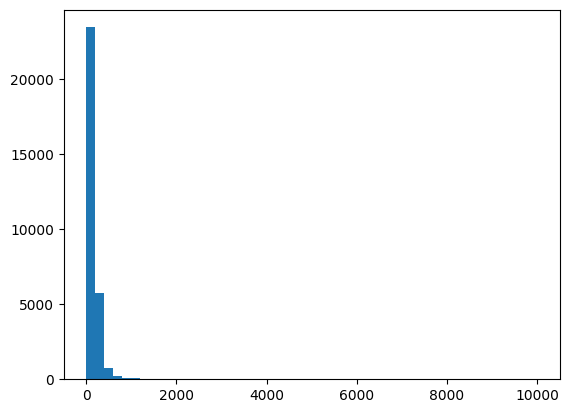

In [7]:
plt.hist(df["Price"], bins=50, range=(0,10000))
plt.show()

plt.show()

In [8]:
df['Price'].min()

10

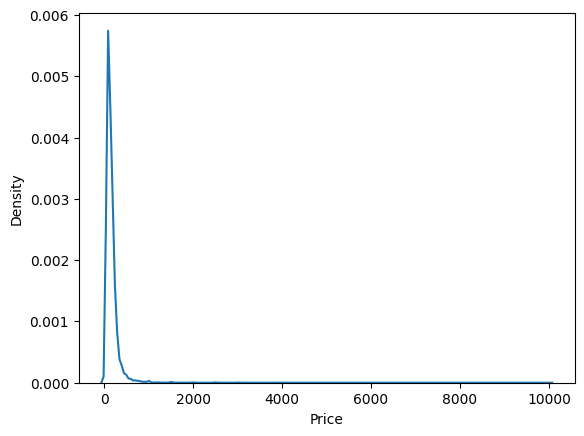

In [9]:
sns.kdeplot(df["Price"])
plt.show()

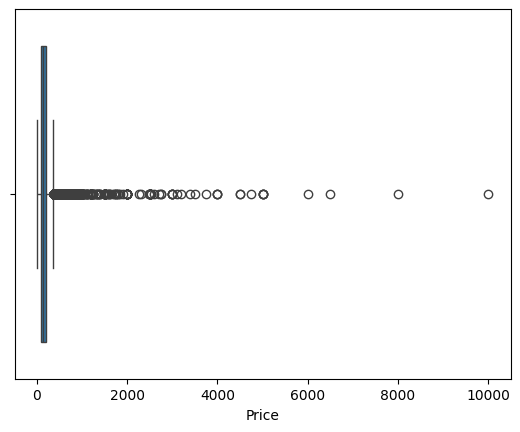

In [10]:
sns.boxplot(x=df["Price"])
plt.show()

Yes this scale is bad the outliers skew the scale a lot and make it difficult to see the bulk of the data



In [11]:
df["price_log"] = np.log(df["Price"])

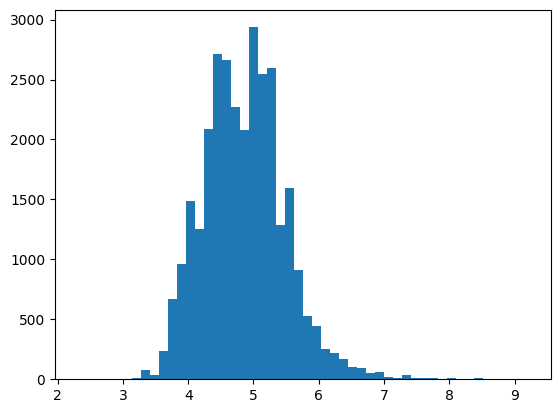

In [12]:
plt.hist(df["price_log"], bins=50)
plt.show()

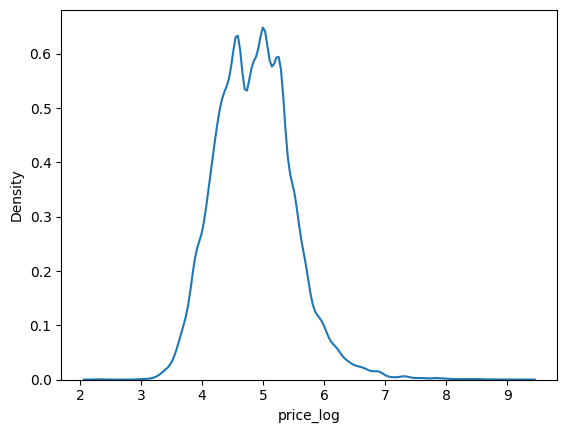

In [13]:
sns.kdeplot(df["price_log"])
plt.show()

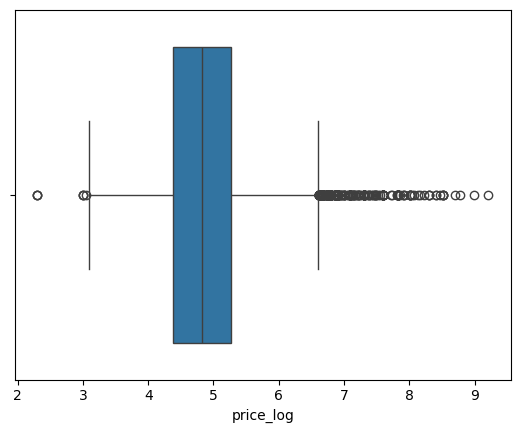

In [14]:
sns.boxplot(x=df["price_log"])
plt.show()

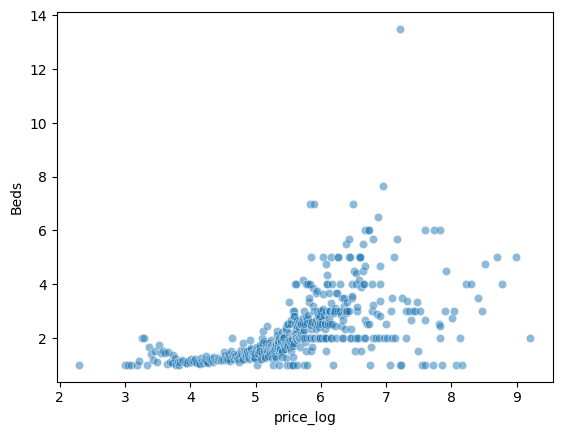

In [40]:
df_grouped = df.groupby("price_log", as_index=False)["Beds"].mean()

sns.scatterplot(data=df_grouped, x="price_log", y="Beds", alpha =0.5)
plt.show()

I didn't really see any trend before I used .groupby() but now I can see that the average number of beds increases as the scaled price of the airbnb increases.

In [32]:
df.groupby("Beds")["Price"].describe()


,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


Looking at the mean and std of the price as the # of beds increases, the average price does too. It seems like there is less variation in the airbnbs with lower ammounts of beds, although that is not always the case.

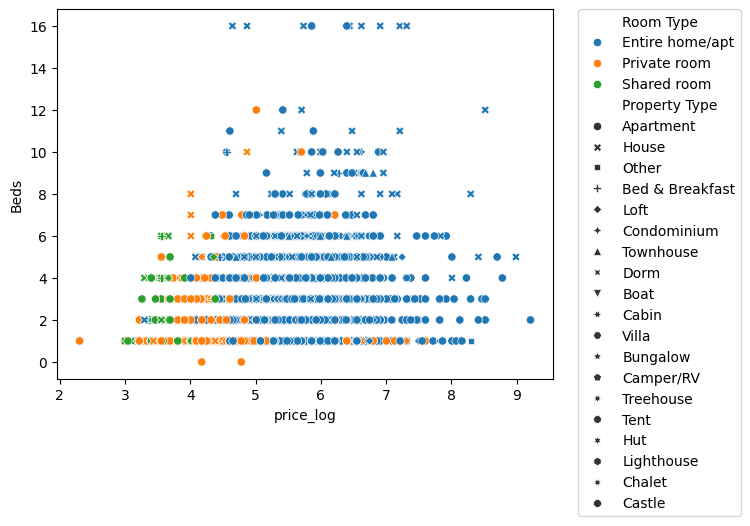

In [38]:
sns.scatterplot(data=df, x="price_log", y="Beds", hue="Room Type", style="Property Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [48]:
roomprop_stats = df.groupby(["Room Type", "Property Type"])["Price"].agg([ "mean", "std", "median", "min", "max"])


max_mean_price = roomprop_stats["mean"].max()

max_std_price = roomprop_stats["std"].max()

max_mean_row = roomprop_stats[roomprop_stats["mean"] == max_mean_price]


max_std_row = roomprop_stats[roomprop_stats["std"] == max_std_price]

print("Row with Max Mean Price:\n", max_mean_row,"\n\n")
print("Row with Max Std Price:\n", max_std_row)

roomprop_stats

Row with Max Mean Price:
                                      mean          std  median  min   max
Room Type       Property Type                                            
Entire home/apt Other          843.428571  1133.062271   300.0   66  4000 


Row with Max Std Price:
                                      mean          std  median  min   max
Room Type       Property Type                                            
Entire home/apt Other          843.428571  1133.062271   300.0   66  4000


mean          std  median  min    max
Room Type       Property Type                                               
Entire home/apt Apartment        213.224839   218.097834   175.0   10  10000
                Bed & Breakfast  184.538462   119.814172   130.0   85    525
                Boat             158.428571    51.110524   150.0  100    250
                Bungalow         150.750000    46.464144   160.5   87    195
                Cabin            250.000000          NaN   250.0  250    250
                Camper/RV        114.333333   107.685963    74.0   45    325
                Condominium      304.861111   266.197497   200.0   80   1990
                Dorm              44.250000    24.060687    33.5   30     80
                House            297.263298   468.409428   195.0   27   8000
                Lighthouse        39.000000          NaN    39.0   39     39
                Loft             330.510204   321.519721   225.0   55   3000
                Other            843.428571  1133.062271   300.0   66   4000
                Townhouse        280.783133   314.605252   190.0   66   2500
                Villa            529.750000   650.963581   249.5  120   1500
Private room    Apartment         92.713900    65.237050    82.0   10   3000
                Bed & Breakfast   97.161290    47.031971    85.0   32    260
                Boat             120.000000          NaN   120.0  120    120
                Cabin             80.000000          NaN    80.0   80     80
                Camper/RV         39.000000          NaN    39.0   39     39
                Castle           150.000000          NaN   150.0  150    150
                Chalet            99.000000          NaN    99.0   99     99
                Condominium       98.590909    40.576394    90.0   46    200
                Dorm              86.562500    40.738137    70.0   50    200
                House             77.750397    49.402650    69.0   25    997
                Hut               75.000000    35.355339    75.0   50    100
                Loft             108.057692   128.817912    85.0   39   1500
                Other            211.931034   235.404505   119.0   39   1200
                Tent             126.250000    94.989034   107.5   40    250
                Townhouse         83.365385    30.578109    80.0   45    150
                Treehouse         95.000000          NaN    95.0   95     95
                Villa            126.250000    71.107313   125.0   60    195
Shared room     Apartment         79.200000    67.720849    66.0   20   1000
                Bed & Breakfast  143.666667   245.328104    65.0   30    900
                Dorm              73.181818    46.328864    55.0   30    200
                House             77.487500   275.409936    45.0   10   2500
                Loft              78.816327    87.521824    50.0   30    525
                Other            148.750000   134.806961    87.5   70    350
                Townhouse         95.000000          NaN    95.0   95     95
                Treehouse        167.666667   114.788211   108.0   95    300

The room type/property type with the highest mean and standard deviation was private room, and the property type was "other". This is probably because there are some obscure, very expensive airbnbs available in NYC and it having the most variation also makes sense because the catergory "other" probably covers a wide variety of properties. The median appears to be a more reliable estimate of central tendancy because it is less sensitive to outliers. Large outliers seem to affect the mean more, especially for property types with less data points.  

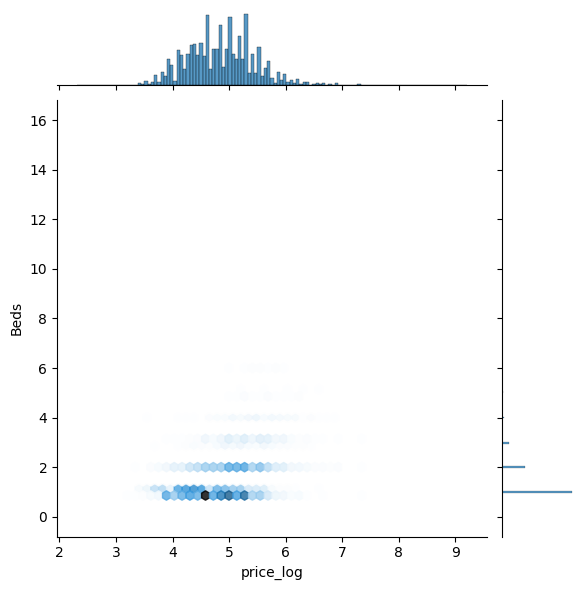

In [51]:
sns.jointplot(data=df, x="price_log", y="Beds", kind="hex", alpha=0.8)
plt.show()

According to this plot, it looks like most of the data is distributed in airbnbs with 1-3 beds and log prices between 4 and 6 (which ends up being around the 55-400 dollar range).
This does affect the way I view the plots from questions 5 and 6, because I think we could hone in on that concentrated data to detect more relevant trends within that range.













---------------------------------------------------

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.